In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# statsmodels은 통계모델
import statsmodels.api as sm
 
# 점심시간 이후 예제에 필요한 모듈추가 ▼▼   
import seaborn as sns
sns.set()

# 대부분의 머신러닝 알고리즘이 담겨있는 모듈 "scikit learn" (보통 아나콘다 설치하면 자동으로 설치돼 있음)
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans # 통계에서 Mean은 "평균"을 의미

In [45]:
''' OLS '''

' OLS '

In [46]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Simple linear regression.csv')

In [47]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [48]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


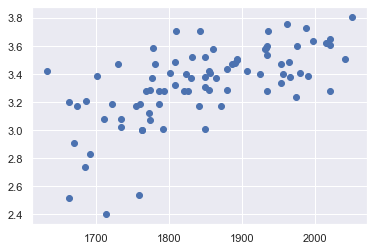

In [49]:
# x값 = SAT,  y값 = GPA
plt.scatter(data.SAT, data.GPA)

In [50]:
''' 머신러닝은 GPA를 먼저 씀(?)
   오차가 가장 작은 값을 찾음
   OLS는 Ordinary Least Squares '''
result = sm.OLS(data.GPA, data.SAT).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                   9.38e-102
Time:                        16:29:58   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

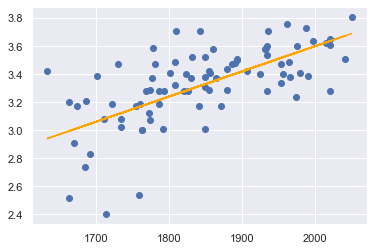

In [51]:
# 계수 coef 이용
GPA = 0.0018*data.SAT
plt.scatter(data.SAT, data.GPA)
plt.plot(data.SAT, GPA, c='orange')

In [52]:
# SAT값이 1715일 때의 GTA 값 (임의의 x값에 따른 y값 예측)
GTA = 1715*0.0018
GTA

3.0869999999999997

In [53]:
# 상수값 만들고..
RX = sm.add_constant(data.SAT)
RX.head()

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693


In [54]:
# 한 축이 1로 고정인 ...
# GPA가 0.0017, 계수가 0.2750
result = sm.OLS(data.GPA, RX).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           7.20e-11
Time:                        16:30:00   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

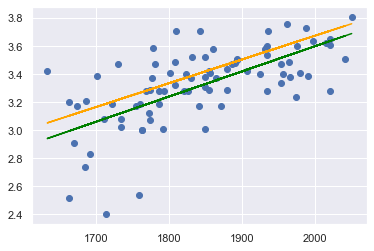

In [55]:
GPA1 = 0.0018*data.SAT
GPA2 = 0.2750 + 0.0017 * data.SAT
plt.scatter(data.SAT, data.GPA)
plt.plot(data.SAT, GPA1, c='green')
plt.plot(data.SAT, GPA2, c='orange')

In [56]:
''' MLR'''

' MLR'

In [57]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Multiple linear regression.csv')
data.head(2)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3


In [58]:
y = data.GPA
original_x = data[['SAT', 'Rand 1,2,3']]

In [59]:
x = sm.add_constant(original_x)
x.head()

,const,SAT,"Rand 1,2,3"
0,1.0,1714,1
1,1.0,1664,3
2,1.0,1760,3
3,1.0,1685,3
4,1.0,1693,2


In [60]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           6.58e-10
Time:                        16:30:02   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
GPA = 0.2960 + 0.0017 * data.SAT + data['Rand 1,2,3']

In [62]:
''' [File] real eatate price size year'''

' [File] real eatate price size year'

In [63]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/real_estate_price_size_year.csv')
y = data['price']
original_x = data[['size', 'year']]
x = sm.add_constant(original_x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.77e-32
Time:                        16:30:03   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
''' Categorical predictors'''

' Categorical predictors'

In [65]:
# 구분자를 주었을 때 어떻게 달라지는지..? 

In [66]:
raw_data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Dummies.csv')
raw_data.tail(2)

,SAT,GPA,Attendance
82,1962,3.76,Yes
83,2050,3.81,Yes


In [67]:
# 데이터 복사 후 값 변경 (yes값 1, no값 0으로)
data = raw_data.copy()
data.Attendance = data.Attendance.map({"Yes":1, "No":0})
data.tail()

,SAT,GPA,Attendance
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1
83,2050,3.81,1


In [68]:
y = data.GPA
x1 = sm.add_constant(data.SAT)
result1 = sm.OLS(y, x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           7.20e-11
Time:                        16:30:06   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
x2 = sm.add_constant(data[['SAT','Attendance']])
result2 = sm.OLS(y, x2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.19e-15
Time:                        16:30:06   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
GPA1 = 0.2750 + 0.0017*data.SAT
GPA2 = 0.6439 + 0.0014*data.SAT + 0.2226*data.Attendance
No = 0.6439 + 0.0014*data.SAT
Yes = 0.8665 + 0.0014*data.SAT

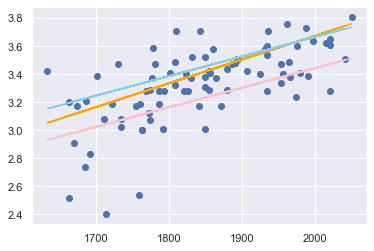

In [71]:
plt.scatter(data.SAT, y)
plt.plot(data.SAT, GPA1, c='orange')

# yes, no 데이터 값의 갭이 매우커서 그린색은 난리남
# Why? Attendance의 값은 0,1인데 GPA2에서 0.2226 * data.Attendance는 0값이 되기 때문
# plt.plot(data.SAT, GPA2, c='green')

# 따라서 yes와 no일 때를 나눠서 plot 가능
plt.plot(data.SAT, No, c='pink')
plt.plot(data.SAT, Yes, c='skyblue')

In [72]:
# 어떤 애는 1700인데 참석 X(0), 다른 애는 1680인데 참석 0(1)
print(0.6439 + 0.0014*1700)
print(0.8665 + 0.0014*1680)

3.0239
3.2184999999999997


In [73]:
# 점심시간 후 ==================================================================================

In [74]:
#resultsAll results
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1680], 'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1680,1


In [75]:
new_data = new_data.rename(index={0:'Bob', 1:'Alice'})
new_data

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1680,1


In [76]:
result2.predict(new_data)

Bob      3.023513
Alice    3.218161
dtype: float64

In [77]:
new_data_all = pd.DataFrame({'const':1, 'SAT':[1700,1680]})
new_data_all = new_data_all.rename(index={0:'Bob', 1:'Alice'})
result.predict(new_data_all)

Bob      3.089710
Alice    3.056596
dtype: float64

In [78]:
''' Linear Regression sklearn'''

' Linear Regression sklearn'

In [79]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [80]:
x = data.SAT
y = data.GPA

# x값 전체
x.values

array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
       1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
       1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
       1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
       1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
       1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
       1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
       2020, 1843, 1936, 1810, 1987, 1962, 2050], dtype=int64)

In [81]:
# x값 모양(?) 재정의, 메트릭트로 꼭 변환해줘야 함
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [82]:
# 좀 길어서 5개만 출력
x_matrix[0:5]

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693]], dtype=int64)

In [83]:
# sklearn.linear_model 사용
# reg = LinearRegression(fir_intercept = False)는 reg.intercept_ 출력 시 0.0값 나옴
reg = LinearRegression() 

# 기계학습은 상수값 넣는걸 하지 않아도 됨
# fit은 y = a0 + a1x1 + a2x2 수식을 데이터에 최대한 가깝게 맞춰나가는 작업 수행 (머신러닝 曰 컴퓨터가 학습한다)
reg.fit(x_matrix, y)

LinearRegression()

In [84]:
reg.score(x_matrix, y)

0.40600391479679765

In [85]:
# 수식에서 a1과 a2 값은 reg.coef_에 목록으로, a0 값은 reg.intercept_에 숫자로 저장됨
reg.coef_, reg.intercept_

(array([0.00165569]), 0.27504029966028076)

In [86]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
reg.predict(new_data) #array([3.15593751, 3.18905127])

array([3.15593751, 3.18905127])

In [115]:
# Multiple linear regression.csv 으로 다시 해보기
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Multiple linear regression.csv')
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [116]:
x= data[['SAT', 'Rand 1,2,3']]
y= data.GPA
reg = LinearRegression()
reg.fit(x,y)
reg.coef_, reg.intercept_  #(array([ 0.00165354, -0.00826982]), 0.29603261264909486)

(array([ 0.00165354, -0.00826982]), 0.29603261264909486)

In [117]:
reg.score(x,y)

0.4066811952814283

In [118]:
''' Logistic Regression'''

' Logistic Regression'

In [91]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Admittance.csv')
data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [92]:
#시본 사용
#set(data.Admitted)

# Admitted2 컬럼 추가 (Admitted컬럼값의 yes,no값을 각각 1,0으로 바꾼 데이터)
data['Admitted2'] = data.Admitted.map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted,Admitted2
0,1363,No,0
1,1792,Yes,1
2,1954,Yes,1
3,1653,No,0
4,1593,No,0


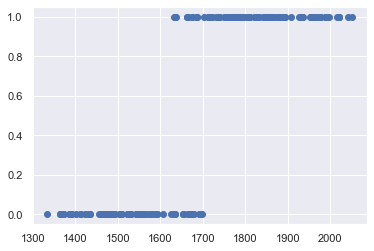

In [93]:
# 도표해석 => 낮은 점수인 사람은 참석 x, 상위 점수인 사람은 참석 o
plt.scatter(data.SAT, data.Admitted2)

In [94]:
y = data.Admitted2
x = sm.add_constant(data.SAT)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Admitted2   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.98e-43
Time:                        16:30:18   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

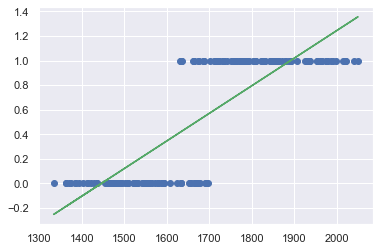

In [95]:
plt.scatter(data.SAT, y, color='C0')
y_hat = result.params[0] + result.params[1]*data.SAT
plt.plot(data.SAT, y_hat, color="C2")

In [96]:
# 로지스틱 함수 => 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법 ..
result2 = sm.Logit(y,x).fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Admitted2   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.7992
Time:                        16:30:19   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [97]:
'''
y =b0 + b1x := logit(p)
e(b0 + b1x)/(1+ e(b0+b1*x)
'''

'\ny =b0 + b1x := logit(p)\ne(b0 + b1x)/(1+ e(b0+b1*x)\n'

In [98]:
def logitToY(x, b0, b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

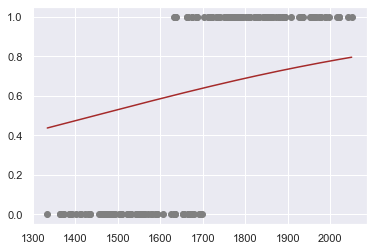

In [99]:
# sort로 값 정리 필요 (안그럼 정신없이 나옴)
y_sorted = np.sort(logitToY(data.SAT, result.params[0], result.params[1]))
x_sorted = np.sort(np.array(data.SAT))

plt.scatter(data.SAT, y, color = 'gray')
plt.plot(x_sorted,y_sorted, color='brown' );

In [100]:
''' Calculating Accuracy Model '''
# 우리가 실험한 결과가 정답 => x,y에서 측정된 값 y가 정답 => 그걸 함수로 만들어 놓음.
# 정답 맞췄는지에 대한 함수

' Calculating Accuracy Model '

In [101]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Bank-data.csv')
data = data.drop(['Unnamed: 0'], axis=1)  # 불필요 값 없애기
data['y'] =data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [102]:
y = data.y
dration = data.duration
x = sm.add_constant(dration)
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.2121
Time:                        16:30:22   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [103]:
data.columns

Index(['interest_rate', 'credit', 'march', 'may', 'previous', 'duration', 'y'], dtype='object')

In [104]:
estimators = ['interest_rate', 'credit', 'march', 'may', 'previous', 'duration']
y = data.y
x = sm.add_constant(data[estimators])
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.5153
Time:                        16:30:23   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

In [105]:
# 정답 맞췄는지 확인 (actual_value => 측정된 값, model => 함수나 y값)
def confusion_matrix(data, actual_value, model):
    pd_values = model.predict(data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_value, pd_values, bins = bins)[0]
    
    #정확도
    accuracy = (cm[0,0] + cm[1,1])/cm.sum()
    return cm, accuracy

In [106]:
pd_values = result.predict(x)

''' # 데이터 확인
    array([0.0, 0.1][1.0, 1.1]) 
    => 0.0과 1.1은 정답을 맞췄다는 의미, 0.1, 1.0은 틀렸다는 의미. 표시된 숫자는 정답 맞춘 카운트(?)
'''
confusion_matrix(x,y,result)

(array([[220.,  39.],
        [ 31., 228.]]),
 0.8648648648648649)

In [127]:
''' Clustering'''
# 데이터 관계를 설명하려 노력.. 분류된 전체 데이터 중 어디에 속하는지.. keyword=군집 
# 데이터는 row로 자름 (그동안 해왔던 column과 정반대), 선택된 컬럼 가로로 나눔
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


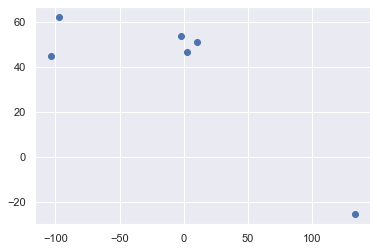

In [128]:
plt.scatter(data.Longitude, data.Latitude)

In [129]:
#x = data[['Latitude', 'Longitude']]
x = data.iloc[:, 1:3]
x.head()

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40


In [131]:
# Kmeans => 몇개로 나눌건지 꼭 숫자 적기
kmeans = KMeans(3)

# 나눌 대상(데이터)
kmeans.fit(x)

# 군집
cluster = kmeans.fit_predict(x)

# 군집 되었는지 cluster 컬럼 추가해 확인
data['cluster'] = cluster
data

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


(-90.0, 90.0)

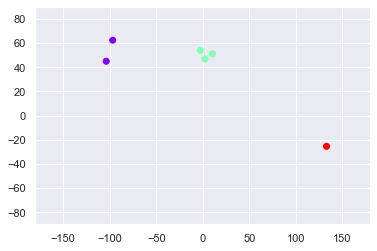

In [135]:
# 군집한 결과를 scatter로 표시
plt.scatter(data.Longitude, data.Latitude, c=data.cluster, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [ ]:
# Categorical.csv 파일

In [170]:
rwdata = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/Categorical.csv')
rwdata

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [171]:
data = rwdata.copy()
data['continent_num'] = data['continent'].map({'Africa':0, 
                                               'Antarctica':1,
                                               'Asia':2,
                                               'Europe':3,
                                               'North America':4,
                                               'Oceania':5,
                                               'Seven seas (open ocean)':6,
                                               'South America':7})
data                                               

,name,Longitude,Latitude,continent,continent_num
0,Aruba,-69.982677,12.520880,North America,4
1,Afghanistan,66.004734,33.835231,Asia,2
2,Angola,17.537368,-12.293361,Africa,0
3,Anguilla,-63.064989,18.223959,North America,4
4,Albania,20.049834,41.142450,Europe,3
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,5
237,Yemen,47.586762,15.909280,Asia,2
238,South Africa,25.083901,-29.000341,Africa,0
239,Zambia,27.774759,-13.458242,Africa,0


(-90.0, 90.0)

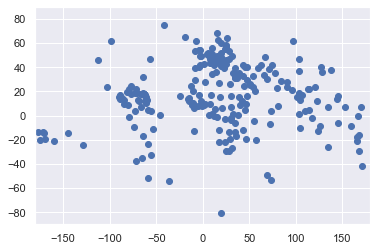

In [172]:
plt.scatter(data.Longitude, data.Latitude)
plt.xlim(-180,180)
plt.ylim(-90,90)

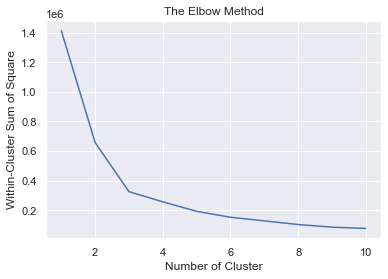

In [174]:
x = data.iloc[:,1:3]
km = KMeans(8)
km.fit(x)

clusters = kmeans.fit_predict(x)
data['cluster'] = clusters

'''
plt.scatter(data.Longitude, data.Latitude, c=data['cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90);
'''

# 데이터-평균 사이 많이 떨어지지 않도록 평균과 데이터의 사이 제곱차이 해서 나눈거(?) sum of square
wcss=[]
for i in range(1,11):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter= kmeans.inertia_
    wcss.append(wcss_iter)
    
number_cluseter = range(1,11)
plt.plot(number_cluseter,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("Within-Cluster Sum of Square");

In [176]:
data = pd.read_csv('../Example Codes/Lec08 Statsmodels/code/data/iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 예제소스 07 Clustering의 In[42] 부터 확인, 전처리과정 (preprocessing)